In [1]:
import sys
import seaborn as sns
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import admin_functions as adfn
import plot as pltfn
import scipy
from scipy import stats 
import IS as isfn
import network_mod as netfn
import matplotlib
import powerlaw
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

sns.reset_orig()
#plt.style.use('dark_background')
%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 

sys.version

'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

# Load Empirical data

In [2]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_av.npy*'))

import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))



for i in range(len(bln_distlist)):
    sns.reset_orig()
    avdistcut = np.load(blnlist[i])[0]
    powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.5, c = 'k')
    avdistcut = np.load(p20list[i])[0]
    powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.5, c = 'red')
    
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i][np.where(bln_distlist[i] < 20000)])
    p20_vec = np.append(p20_vec, p20_distlist[i][np.where(p20_distlist[i] < 20000)])

avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =5 , markersize = 1, alpha = 1)
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =5 , markersize = 1, alpha = 1)

axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

NameError: name 'bln_distlist' is not defined

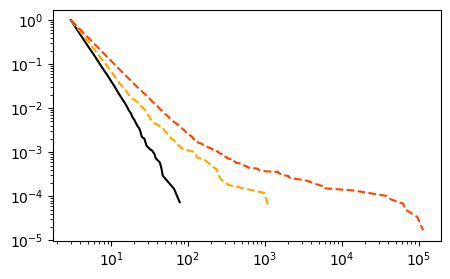

In [4]:
# Choose path and create lists of coord and trace files

# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_randbase*av.npy*'))
prelist = sorted(glob.glob('*PTZ20*_preictal*av.npy*'))
p20list = sorted(glob.glob('*PTZ20*_ictal*av.npy*'))

choose = 0
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
pre_distlist = [np.load(prelist[i])[choose] for i in range(len(prelist))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec = []
pre_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i])
    pre_vec = np.append(pre_vec, pre_distlist[i])
    p20_vec = np.append(p20_vec, p20_distlist[i])
    
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (5,3))
sns.reset_orig()
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'k')
sns.reset_orig()
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered')

plt.show()

# Build network
* unconnected nodes from real fish structure
* k-means on all fish warped to same space: k = mean number of cells
* n cells - distance between cells in space

In [ ]:
#Plot all registered cells
fig,axarr = plt.subplots(figsize = (10,10))
comb_coords = np.load(reglist[0])
for i in range(len(reglist)-1):
    comb_coords = np.row_stack((comb_coords,np.load(reglist[i+1])))

spatial_conversion = [.5, .5, 15]
space_coord = np.multiply(comb_coords, spatial_conversion)
axarr.scatter(space_coord[:,0], space_coord[:,1], s = 4, color = 'black' , alpha = 0.03)
plt.show()
#How many cell clusters - mean of all cells used in av calculation
sumd = 0
for i in range(len(coordlist)):
    sumd = sumd + np.load(coordlist[i]).shape[0]
n_clust = np.int(sumd/len(coordlist))
print(str(n_clust))

In [ ]:
#Remove unwanted coords for plotting
x,y = 140, 240 
coordvec = []
for i in range(5):
    x  = x+10
    y = y-10
    xcoord = np.where(space_coord[:,0] > x)[0]
    ycoord = np.where((space_coord[:,1] > y))[0]
    coordvec = np.append(coordvec, np.intersect1d(xcoord,ycoord))
    
remaining = np.where(space_coord[:,1]< 5)
coordvec = np.append(coordvec, remaining)
coordvec = np.unique(coordvec.astype(int))

new_space_coord = np.zeros((space_coord.shape[0] - coordvec.shape[0], 3))
count=0
for i in range(space_coord.shape[0]):
    if i in coordvec:
        continue
    else:
        new_space_coord[count] = space_coord[i]
        count+=1


In [ ]:
#PLot outlier removal
fig,axarr = plt.subplots(figsize = (10,10))
axarr.scatter(space_coord[:,0], space_coord[:,1], s = 4, color = 'grey' , alpha = 0.1)
axarr.scatter(space_coord[:,0][coordvec], space_coord[:,1][coordvec], s = 4, color = 'red' , alpha = 0.1)
plt.show()

fig,axarr = plt.subplots(figsize = (10,10))
axarr.scatter(new_space_coord[:,0], new_space_coord[:,1], s = 4, color = 'grey' , alpha = 0.1)
plt.show()

sumd = 0
for i in range(len(coordlist)):
    sumd = sumd + np.load(coordlist[i]).shape[0]
n_clust = np.int(sumd/len(coordlist))
print(str(n_clust))

In [ ]:
#Kmeans clustering
from sklearn.cluster import KMeans
kmeans   = KMeans(n_clusters=n_clust, random_state=0).fit(new_space_coord)  #perform k means on all cells
klab =  kmeans.labels_
space_coord_labels = np.column_stack((new_space_coord, klab))
np.save(savepath + 'klabels-spaced-coords.npy', space_coord_labels)

In [ ]:
#Average cells by labels to make new cluster
coords = np.load(net[0])
unq = np.unique(coords[:,3]).astype(int)
node_coord = np.zeros((unq.shape[0], 3))
for i in unq:
    data = coords[np.where(coords[:,3] == unq[i])][:,:3]
    node_coord[i] = [sum(x)/len(x) for x in zip(*data)]
np.save(savepath + 'knodes-coords.npy', node_coord)

In [ ]:
fig,axarr = plt.subplots(figsize = (10,10))
coords = np.load(net[0])
axarr.scatter(coords[:,0], coords[:,1], s = 4, color = 'grey' , alpha = 0.05)
axarr.scatter(node_coord[:,0], node_coord[:,1], s = 4, color = 'red' , alpha = 0.3)
plt.show()

# Connect network

## Network types

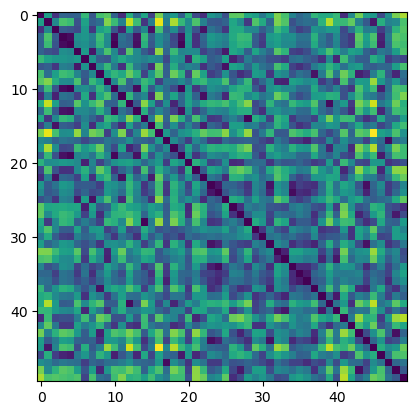

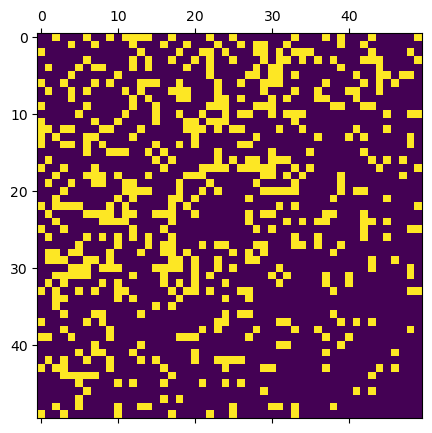

In [5]:
from sklearn.metrics.pairwise import euclidean_distances

#Watts Strogatz - small world network
Nnodes    = 50
cell_locs = np.random.rand(Nnodes, 2)
dist = euclidean_distances(cell_locs)
p = 0.9
k = 10
plt.imshow(dist)
plt.show()

ws = netfn.ws_netsim(dist).net_generate(k, p, 'undirected').A
fig, axarr = plt.subplots(figsize = (5,5))                   
axarr.matshow(ws)
plt.show()



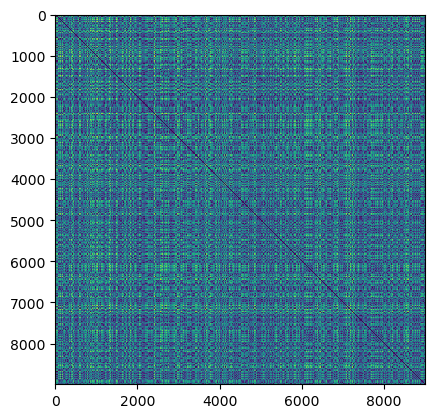

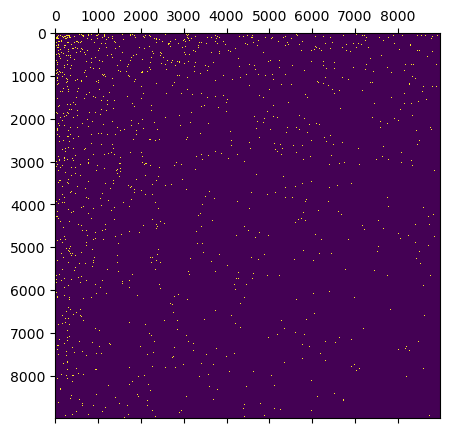

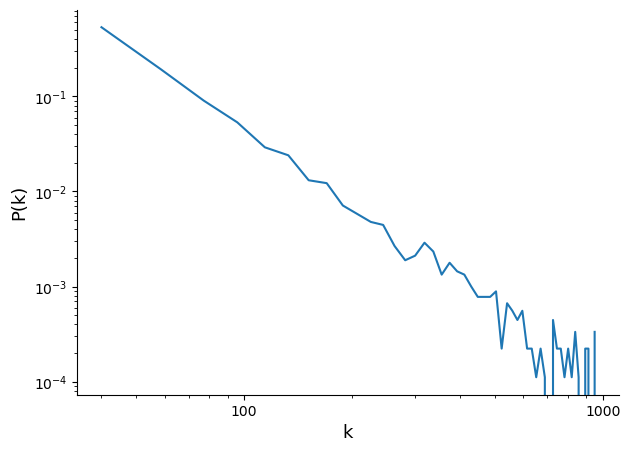

In [413]:
#Barabasi albert - scale free
Nnodes    = nodes.shape[0]
cell_locs = np.random.rand(Nnodes, 2)
dist = euclidean_distances(cell_locs)
k = 40
plt.imshow(dist)
plt.show()

ba = netfn.ba_netsim(dist).net_generate(k, 'directed').A
fig, axarr = plt.subplots(figsize = (5,5))                   
axarr.matshow(ba)
plt.show()

#Degree distribution
import matplotlib 
fig, axarr = plt.subplots(figsize = (7,5))
avdistcut = np.sum(ba, axis = 1)
hist = np.histogram(avdistcut, bins = 50)
xaxis = hist[1]
yaxis = hist[0]/np.sum(hist[0])
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('P(k)', size = '13')
axarr.set_xlabel('k', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

# Select parameters
* k = edge density, number of nearest neighbours to connect to
* s = edge weight (probability of firing), scaled for distance
* c = clustering coefficient


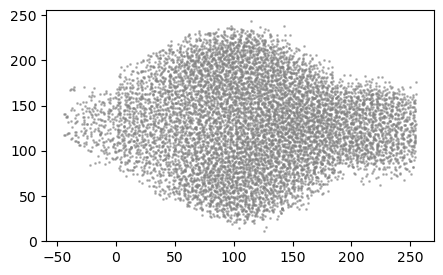

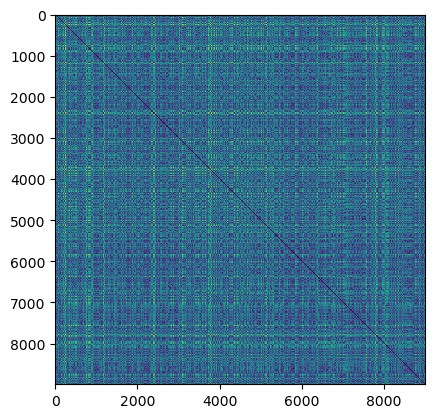

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     

# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)

node = sorted(glob.glob('knodes*'))
fig,axarr = plt.subplots(figsize = (5,3))
nodes = np.load(node[0])
net_nnb = np.load(sorted(glob.glob('*net_model_nnb*'))[0])
axarr.scatter(nodes[:,0], nodes[:,1], s = 1, color = 'grey' , alpha = 0.5)
plt.show()

dist = euclidean_distances(nodes)
plt.imshow(dist)
plt.show()

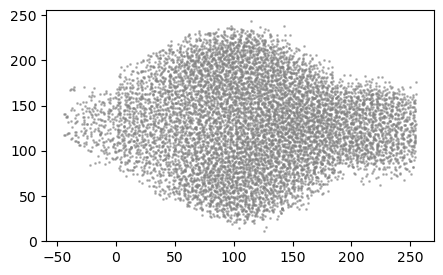

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances
import copy     

# Node coordinates
#---------------------------------------------------------------------------
os.chdir(Fdrop + 'Project/' + experiment)

node = sorted(glob.glob('knodes*'))
fig,axarr = plt.subplots(figsize = (5,3))
nodes = np.load(node[0])
axarr.scatter(nodes[:,0], nodes[:,1], s = 1, color = 'grey' , alpha = 0.5)
plt.show()


In [100]:
nodes_cv = np.zeros((nodes.shape[0], 4))
nodes_cv[:,0] = np.arange(nodes.shape[0]) 
nodes_cv[:,1] = np.arange(nodes.shape[0]) 
nodes_cv[:,2:] = nodes[:,:2]


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [82]:
prac_r = 0
curr = netfn.ba_netsim(dist).adjmat_generate(10, s, prac_r, divisor, soften, 'directed')
A = curr.A
W = curr.adj_mat
rows, cols = np.nonzero(A)
w = W[rows, cols]

In [97]:
np.savetxt("r0_k10_edges.csv", edges_cv, delimiter=",", fmt='%f')
np.savetxt("nodes.csv", nodes_cv, delimiter=",", fmt='%f')


In [ ]:
#Single parameter for scaling and relaxing
# Simple sigmoid function to 'soften' the exponential
#-------------------------------------------------------------------------------
def sig(x):
  return 1 / (1+np.exp(-x))

# Conversion from distance to edge weights, scaled (itself exponentially) by s
#-------------------------------------------------------------------------------
def dist2edge(distance, divisor, s):
  edgeweights = np.exp(s/5)*sig(np.exp(-soften/np.exp(s)*distance))/divisor
  return edgeweights

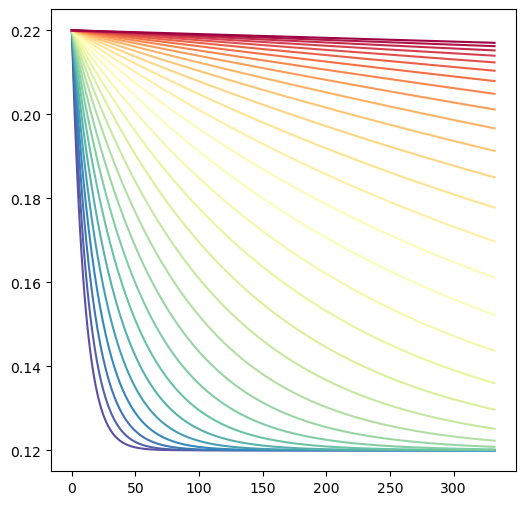

In [115]:
#Two parameters - one for scaling (s) + one for relaxing (r)
# Conversion from distance to edge weights, scaled (itself exponentially) by s
#s = 1.2, soften = 0.1, divisor = 10
#-------------------------------------------------------------------------------
def dist2edge(distance, divisor, r,s):
    edgeweights = (s + np.exp(-soften/np.exp(r)*distance))/divisor
    return edgeweights

#S parameters
Nsteps  = 30
divisor = 10
soften = 0.1
r_vals   = np.array(np.linspace(0, 7, Nsteps)).tolist()
s = 1.2
#Plot each s value
fig, ax = plt.subplots(1, figsize=(6,6))
colors  = cm.Spectral_r(np.linspace(0,1,Nsteps))
distance = np.linspace(0, np.max(dist), 300)
for r in range(len(r_vals)):
    ax.plot(distance, dist2edge(distance, divisor, r_vals[r], s), c=colors[r])
#ax.set_xscale('log')
#ax.set_yscale('log')
plt.savefig('r_scaling.svg', transparent = True)

plt.show()

# Add dynamics
* network of LIF neurons

In [116]:
import brian2 as b2
from random import sample
from numpy import random

## LIF PARAMETERS
#Network dynamics
sim_time = 400
N = nodes.shape[0] 
v_rest= 0 #Resting potential
t_syn_del = 1 * b2.ms #delay between presynaptic spike and postsynaptic increase
tau_l = 20. * b2.ms #leak time constant - time taken for voltage to reach 63% of resting value
s = 1.2 #Synaptic weights

#External input
N_e = 1000 #number of presynaptic excitatory poisson neurons 
lam = 10 * b2.Hz #poisson rate of external population
w_e= 0.1  #synaptic weight of excitatory external possion neurons onto all neurons 

doing time step 0of400for fish 
doing time step 40of400for fish 
doing time step 80of400for fish 
doing time step 120of400for fish 
doing time step 160of400for fish 
doing time step 200of400for fish 
doing time step 240of400for fish 
doing time step 280of400for fish 
doing time step 320of400for fish 
doing time step 360of400for fish 


WARNING    /Users/dominicburrows/Dropbox/PhD/Analysis/py_scripts/suite2p_analysis_py/avalanches.py:267: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  avframescut = framesvec[[avsize >=3]]
 [py.warnings]


doing time step 0of400for fish 
doing time step 40of400for fish 
doing time step 80of400for fish 
doing time step 120of400for fish 
doing time step 160of400for fish 
doing time step 200of400for fish 
doing time step 240of400for fish 
doing time step 280of400for fish 
doing time step 320of400for fish 
doing time step 360of400for fish 


WARNING    /Users/dominicburrows/Dropbox/PhD/Analysis/py_scripts/suite2p_analysis_py/avalanches.py:267: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  avframescut = framesvec[[avsize >=3]]
 [py.warnings]


doing time step 0of400for fish 
doing time step 40of400for fish 
doing time step 80of400for fish 
doing time step 120of400for fish 
doing time step 160of400for fish 
doing time step 200of400for fish 
doing time step 240of400for fish 
doing time step 280of400for fish 
doing time step 320of400for fish 
doing time step 360of400for fish 


WARNING    /Users/dominicburrows/Dropbox/PhD/Analysis/py_scripts/suite2p_analysis_py/avalanches.py:267: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  avframescut = framesvec[[avsize >=3]]
 [py.warnings]


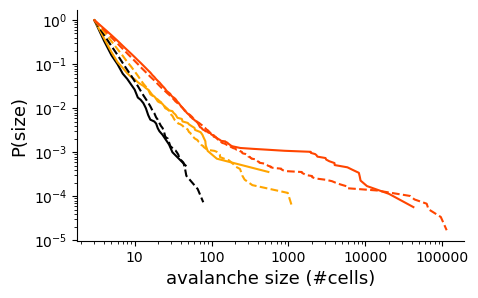

In [143]:
#Parameters
k_list = [12, 15, 40]
v_th = 20 #spike threshold
r_list = [0,1,1] #relax parameter


#Network dynamics
sim_time = 400 #ms - 10 time steps per ms
s = 1.2 #Synaptic weights
N = nodes.shape[0] 
v_rest= 0 #Resting potential
t_syn_del = 1 * b2.ms #delay between presynaptic spike and postsynaptic increase
tau_l = 20. * b2.ms #leak time constant - time taken for voltage to reach 63% of resting value

#External input
N_e = 1000 #number of presynaptic excitatory poisson neurons 
lam = 10 * b2.Hz #poisson rate of external population
w_e= 0.1  #synaptic weight of excitatory external possion neurons onto all neurons 

fig, axarr = plt.subplots(figsize = (5,3))
colors = ['black', 'orange', 'orangered']
sns.reset_orig()
for i in range(len(r_list)):
    bind, spikes, volt = netfn.run_net(sim_time, k_list[i], v_th, r_list[i], s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
    av = crfn.avalanche_r(net_nnb, bind)
    powerlaw.plot_ccdf(av[0], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i]) 

avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[0])
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[1])
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[2])
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

# Fit baseline parameters
* k = 5 - 40 edges
* vth = 15 - 22
* r = 0 - 7
* cost function - bln/pre: cost_mean, p20: cost_max 

In [48]:
k_vals = np.arange(5, 40, 4)
v_th_vals = np.arange(10,22, 2)
r_vals = np.arange(0,7, 1)

In [10]:
# COST LANDSCAPE - COARSE SWEEP
cost_max_vec = np.zeros((len(k_vals), len(v_th_vals), len(r_vals)))
cost_mean_vec = np.zeros((len(k_vals), len(v_th_vals), len(r_vals)))
for k_c, k in enumerate(k_vals):
    for v_th_c, v_th in enumerate(v_th_vals):
        for r_c, r in enumerate(r_vals):
            bind, spikes, volt = netfn.run_net(sim_time, k, v_th, r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
            av,pkg = crfn.avalanche_r(net_nnb, bind)
            cost_max, cost_mean = netfn.ks_log(av[0], bln_vec)
            cost_max_vec[k_c][v_th_c][r_c] = cost_max
            cost_mean_vec[k_c][v_th_c][r_c] = cost_mean
    print('Done k - ' + str(k))
np.save(Fdrop + 'Project/' + experiment + os.sep + 'paramsweepbln_cost_max', cost_max_vec)
np.save(Fdrop + 'Project/' + experiment + os.sep + 'paramsweepbln_cost_mean', cost_mean_vec)

Done k - 5
Done k - 9
Done k - 13
Done k - 17
Done k - 21
Done k - 25
Done k - 29
Done k - 33
Done k - 37


In [49]:
os.chdir(Fdrop + 'Project/' + experiment)
bln_sweep_max = sorted(glob.glob('*bln_cost_max*'))
bln_sweep_mean = sorted(glob.glob('*bln_cost_mean*'))
pre_sweep_max = sorted(glob.glob('*pre_cost_max*'))
pre_sweep_mean = sorted(glob.glob('*pre_cost_mean*'))

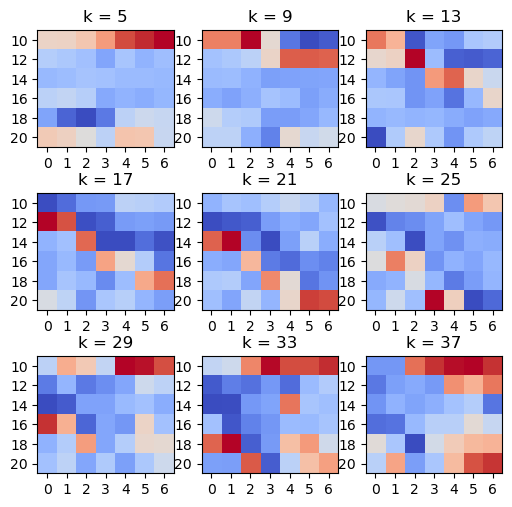

In [53]:
#NON-CONVEX FUNCTION - MULTIPLE LOCAL MINIMA
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
data_mat = np.load(bln_sweep_mean[0])
plt.figure(figsize=(6,6))
for i in range(len(k_vals)):
    curr = data_mat[i]
    plt.subplot(3,3,i+1)
    plot1 = plt.imshow(curr, cmap = 'coolwarm')
    plt.gca().set_title('k = ' + str(k_vals[i]))
    #plt.gca().set_xlabel('r', size = '15')
    #plt.gca().set_ylabel('v_th', size = '15')
    plt.gca().locator_params(axis='y', nbins=len(v_th_vals))
    plt.gca().locator_params(axis='x', nbins=len(r_vals))
    plt.gca().set_xticklabels(np.append(0,  r_vals) , fontsize = 10)
    plt.gca().set_yticklabels(np.append(0,v_th_vals), fontsize = 10)
plt.show()

In [ ]:
## VISUALISE



## Fit to baseline whole recording

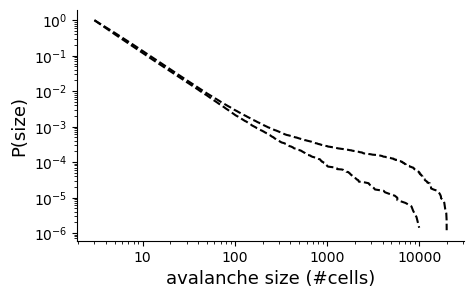

In [10]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()

avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [10]:
av[0][0]

array([3, 3, 5, ..., 7, 4, 3])

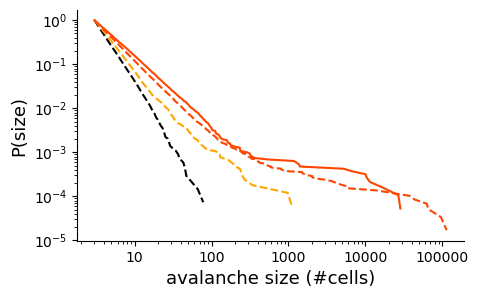

In [12]:
#Parameters
k_list = [38]
v_th = 19 #spike threshold
r_list = [0] #relax parameter


#Network dynamics
sim_time = 400 #ms - 10 time steps per ms
s = 1.2 #Synaptic weights
N = nodes.shape[0] 
v_rest= 0 #Resting potential
t_syn_del = 1 * b2.ms #delay between presynaptic spike and postsynaptic increase
tau_l = 20. * b2.ms #leak time constant - time taken for voltage to reach 63% of resting value

#External input
N_e = 1000 #number of presynaptic excitatory poisson neurons 
lam = 10 * b2.Hz #poisson rate of external population
w_e= 0.1  #synaptic weight of excitatory external possion neurons onto all neurons 

fig, axarr = plt.subplots(figsize = (5,3))
colors = ['black', 'orange', 'orangered']
sns.reset_orig()
for i in range(len(r_list)):
    bind, spikes, volt, spike_mon = netfn.run_net(sim_time, k_list[i], v_th, r_list[i], s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
    av, pkg = crfn.avalanche_r(net_nnb, bind)
    powerlaw.plot_ccdf(av[0], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered') 

avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[0])
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[1])
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[2])
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

## Fit to baseline

In [8]:
os.chdir(Fdrop + 'Project/' + experiment)
bln_fit = sorted(glob.glob('*brute_optimise*bln*'))
bln_fit

['brute_optimise_max_bln.npy']

In [9]:
bln_max = np.load(bln_fit[0], allow_pickle=True)[-1][0]
k = bln_max[0]
v_th = bln_max[1]
r = bln_max[2]
k, v_th, r

(5.00000652684149, 18.999942714750837, 5.250013009648342)

In [10]:
#Network dynamics

sim_time = 400 #ms - 10 time steps per ms
s = 1.2 #Synaptic weights
N = nodes.shape[0] 
v_rest= 0 #Resting potential
t_syn_del = 1 * b2.ms #delay between presynaptic spike and postsynaptic increase
tau_l = 20. * b2.ms #leak time constant - time taken for voltage to reach 63% of resting value

#External input
N_e = 1000 #number of presynaptic excitatory poisson neurons 
lam = 10 * b2.Hz #poisson rate of external population
w_e= 0.1  #synaptic weight of excitatory external possion neurons onto all neurons 

bind, spikes, volt, sim_mon = netfn.run_net(sim_time, int(k), v_th, r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
av, pkg = crfn.avalanche_r(net_nnb, bind)

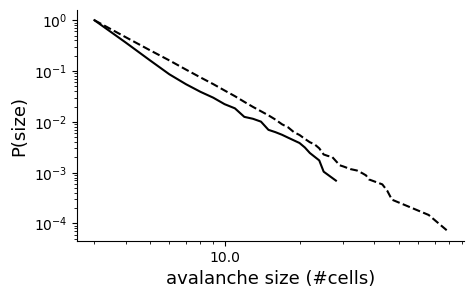

In [11]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()

powerlaw.plot_ccdf(av[0], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 

avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [32]:
k = 10
v_th = 20
r = 2
k, v_th, r

(10, 20, 2)

In [38]:
#Network dynamics
sim_time = 400 #ms - 10 time steps per ms
s = 1.2 #Synaptic weights
N = nodes.shape[0] 
v_rest= 0 #Resting potential
t_syn_del = 1 * b2.ms #delay between presynaptic spike and postsynaptic increase
tau_l = 20. * b2.ms #leak time constant - time taken for voltage to reach 63% of resting value

#External input
N_e = 1000 #number of presynaptic excitatory poisson neurons 
lam = 10 * b2.Hz #poisson rate of external population
w_e= 0.1  #synaptic weight of excitatory external possion neurons onto all neurons 

av_comb = []
for i in range(10):

    bind, spikes, volt, sim_mon = netfn.run_net(sim_time, int(k), v_th, r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
    av, pkg = crfn.avalanche_r(net_nnb, bind)
    av_comb = np.append(av_comb, av[0])

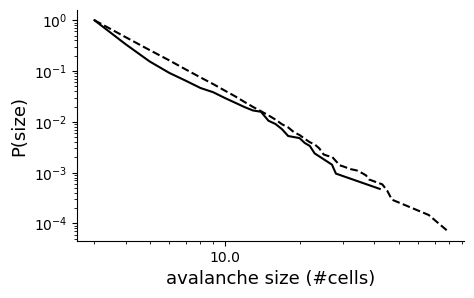

In [34]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()

powerlaw.plot_ccdf(av[0], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 

avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

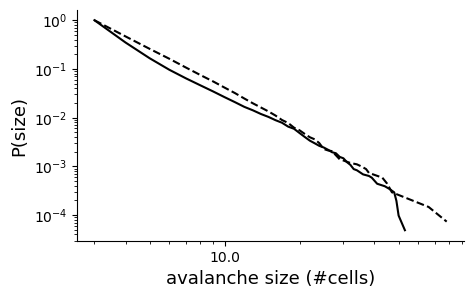

In [41]:
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange', 'orangered']
sns.reset_orig()

powerlaw.plot_ccdf(av_comb, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 

avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [76]:
#Network dynamics
sim_time = 400 #ms - 10 time steps per ms
s = 1.2 #Synaptic weights
N = nodes.shape[0] 
v_rest= 0 #Resting potential
t_syn_del = 1 * b2.ms #delay between presynaptic spike and postsynaptic increase
tau_l = 20. * b2.ms #leak time constant - time taken for voltage to reach 63% of resting value

#External input
N_e = 1000 #number of presynaptic excitatory poisson neurons 
lam = 10 * b2.Hz #poisson rate of external population
w_e= 0.1  #synaptic weight of excitatory external possion neurons onto all neurons 

fig, axarr = plt.subplots(figsize = (5,3))
colors = ['black', 'orange', 'orangered']
sns.reset_orig()
av_list = list(range(100))

for i in range(100):
    bind, spikes, volt, sim_mon = netfn.run_net(sim_time, int(k), v_th, r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
    av_list[i], pkg = crfn.avalanche_r(net_nnb, bind)

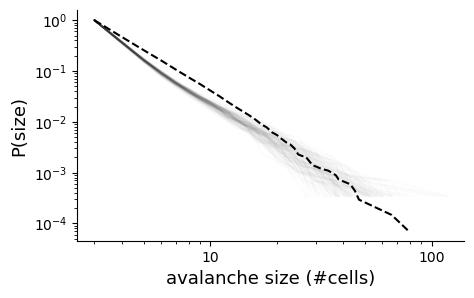

In [79]:
#COST MAX
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['black']
sns.reset_orig()

for i in range(100):
    av = av_list[i]
    powerlaw.plot_ccdf(av[0], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.01, c = 'black') 

avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

## Fit to preseizure


In [124]:
os.chdir(Fdrop + 'Project/' + experiment)
pre_fit = sorted(glob.glob('*brute*optimise*pre.*'))
pre_fit

['brute_optimise_max_pre.npy', 'brute_optimise_mean_pre.npy']

In [17]:
max_pre = np.load(pre_fit[0], allow_pickle=True)[-1][0]
mean_pre = np.load(pre_fit[1], allow_pickle=True)[-1][0]
listlist = max_pre, mean_pre
listlist

(array([10.26442731, 18.22834696,  0.99731289]),
 array([ 2.45891693e+01,  1.89998368e+01, -3.13542149e-07]))

In [18]:
k_list = [listlist[i][0] for i in range(len(listlist))]
v_th_list = [listlist[i][1] for i in range(len(listlist))]
r_list = [listlist[i][2] for i in range(len(listlist))]
r_list[1] = int(r_list[1])
k_list, v_th_list, r_list

([10.26442731072996, 24.5891692940174],
 [18.228346957575297, 18.999836773778092],
 [0.9973128946616536, 0])

In [43]:
#Network dynamics
sim_time = 400 #ms - 10 time steps per ms
s = 1.2 #Synaptic weights
N = nodes.shape[0] 
v_rest= 0 #Resting potential
t_syn_del = 1 * b2.ms #delay between presynaptic spike and postsynaptic increase
tau_l = 20. * b2.ms #leak time constant - time taken for voltage to reach 63% of resting value

#External input
N_e = 1000 #number of presynaptic excitatory poisson neurons 
lam = 10 * b2.Hz #poisson rate of external population
w_e= 0.1  #synaptic weight of excitatory external possion neurons onto all neurons 

fig, axarr = plt.subplots(figsize = (5,3))
colors = ['black', 'orange', 'orangered']
sns.reset_orig()
av_list = list(range(len(k_list)))

for i in range(len(k_list)):
    bind, spikes, volt, sim_mon = netfn.run_net(sim_time, int(k_list[i]), v_th_list[i], r_list[i], s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
    av_list[i], pkg = crfn.avalanche_r(net_nnb, bind)

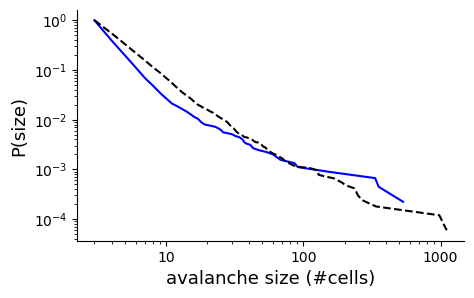

In [53]:
#COST MAX
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['blue', 'green']
sns.reset_orig()

av = av_list[0]
powerlaw.plot_ccdf(av[0], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[0]) 

avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

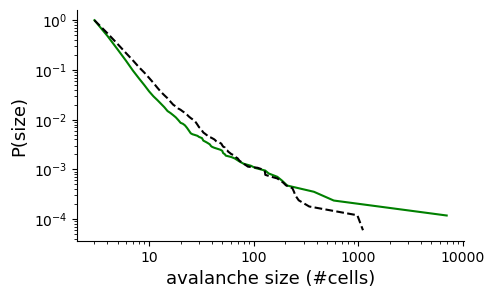

In [54]:
#COST MEAN
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['blue', 'green']
sns.reset_orig()

av = av_list[1]
powerlaw.plot_ccdf(av[0], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[1]) 

avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [59]:
k_list, v_th_list, r_list

([10.26442731072996, 24.5891692940174],
 [18.228346957575297, 18.999836773778092],
 [0.9973128946616536, 0])

In [60]:
#Network dynamics
sim_time = 400 #ms - 10 time steps per ms
s = 1.2 #Synaptic weights
N = nodes.shape[0] 
v_rest= 0 #Resting potential
t_syn_del = 1 * b2.ms #delay between presynaptic spike and postsynaptic increase
tau_l = 20. * b2.ms #leak time constant - time taken for voltage to reach 63% of resting value

#External input
N_e = 1000 #number of presynaptic excitatory poisson neurons 
lam = 10 * b2.Hz #poisson rate of external population
w_e= 0.1  #synaptic weight of excitatory external possion neurons onto all neurons 

fig, axarr = plt.subplots(figsize = (5,3))
colors = ['black', 'orange', 'orangered']
sns.reset_orig()
av_listlist = list(range(len(k_list)))
av_list = list(range(100))


for x in range(len(av_listlist)):
    for i in range(len(av_list)):
        bind, spikes, volt, sim_mon = netfn.run_net(sim_time, int(k_list[x]), v_th_list[x], r_list[x], s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
        av_list[i], pkg = crfn.avalanche_r(net_nnb, bind)
    av_listlist[x] = av_list

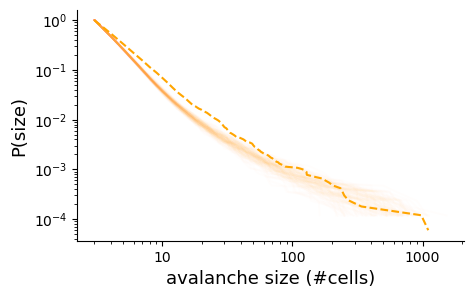

In [68]:
#COST MAX
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange']
sns.reset_orig()

for i in range(100):
    av = av_listlist[0][i]
    powerlaw.plot_ccdf(av[0][np.where(av[0] < 6000)], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.01, c = 'orange') 

avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

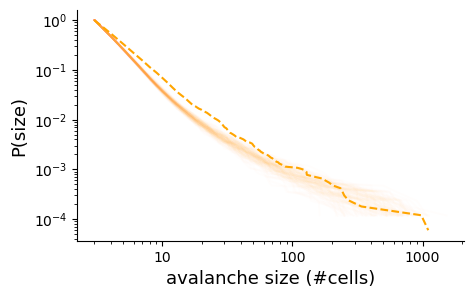

In [69]:
#COST MEAN
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange']
sns.reset_orig()

for i in range(100):
    av = av_listlist[1][i]
    powerlaw.plot_ccdf(av[0][np.where(av[0] < 6000)], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.01, c = 'orange') 

avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [ ]:
#==============================
def ks_log(empirical, model, cutoff): #Find the distance between 2 distributions in log space
#==============================
    import numpy as np
    import matplotlib
    from matplotlib import pyplot as plt
    fig, axarr = plt.subplots(figsize = (5,3))
    binvec = np.append(empirical,model)
    mini = np.min(binvec)
    maxi = np.max(binvec)
    bins = 100000
    model_hist = axarr.hist(model, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
    model_xaxis = np.log10(model_hist[1])
    model_yaxis = np.log10(model_hist[0])

    emp_hist = axarr.hist(empirical, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
    emp_xaxis = np.log10(emp_hist[1])
    emp_yaxis = np.log10(emp_hist[0])

    mod_inf = np.where(model_yaxis == float('-inf'))[0]
    emp_inf = np.where(emp_yaxis == float('-inf'))[0]
    plt.close(fig)
    
    
    if len(emp_inf) == 0 and len(mod_inf) == 0:
        end_index = len(emp_inf)

    elif len(emp_inf) == 0:
        end_index = mod_inf[0] 

    elif len(mod_inf) == 0:
        end_index = emp_inf[0] 
        

    diff_vec = abs(abs(model_yaxis[:end_index]) - abs(emp_yaxis[:end_index ]))

    cost_max, cost_mean = np.max(diff_vec), np.mean(diff_vec)
    
    if len(emp_inf) > cutoff or len(mod_inf)>cutoff:
        cost_max, cost_mean = 1,1

    return(cost_max, cost_mean)

# Model comparison

In [53]:
#BLN PRAC PARAMS
k = 10
v_th = 20
r = 2
k, v_th, r

(10, 20, 2)

In [54]:
#Network dynamics
sim_time = 400 #ms - 10 time steps per ms
s = 1.2 #Synaptic weights
N = nodes.shape[0] 
v_rest= 0 #Resting potential
t_syn_del = 1 * b2.ms #delay between presynaptic spike and postsynaptic increase
tau_l = 20. * b2.ms #leak time constant - time taken for voltage to reach 63% of resting value

#External input
N_e = 1000 #number of presynaptic excitatory poisson neurons 
lam = 10 * b2.Hz #poisson rate of external population
w_e= 0.1  #synaptic weight of excitatory external possion neurons onto all neurons 

bln_av = []
for i in range(8):
    bind, spikes, volt, sim_mon = netfn.run_net(sim_time, int(k), v_th, r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
    av, pkg = crfn.avalanche_r(net_nnb, bind)
    bln_av = np.append(bln_av, av[0])

In [57]:
#Network dynamics
sim_time = 400 #ms - 10 time steps per ms
s = 1.2 #Synaptic weights
N = nodes.shape[0] 
v_rest= 0 #Resting potential
t_syn_del = 1 * b2.ms #delay between presynaptic spike and postsynaptic increase
tau_l = 20. * b2.ms #leak time constant - time taken for voltage to reach 63% of resting value

#External input
N_e = 1000 #number of presynaptic excitatory poisson neurons 
lam = 10 * b2.Hz #poisson rate of external population
w_e= 0.1  #synaptic weight of excitatory external possion neurons onto all neurons 

bln_av_list = list(range(100))
for t in range(100):
    bln_av = []
    for i in range(8):
        bind, spikes, volt, sim_mon = netfn.run_net(sim_time, int(k), v_th, r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
        av, pkg = crfn.avalanche_r(net_nnb, bind)
        bln_av = np.append(bln_av, av[0])
    bln_av_list[t] = bln_av

In [126]:
#PRE PRAC PARAMS
mean_pre = np.load(pre_fit[1], allow_pickle=True)[-1][0]
pre_k = int(mean_pre[0])
pre_v_th = mean_pre[1]
pre_r = int(mean_pre[2])
pre_k, pre_v_th, pre_r

(24, 18.999836773778092, 0)

In [59]:
#Network dynamics
sim_time = 400 #ms - 10 time steps per ms
s = 1.2 #Synaptic weights
N = nodes.shape[0] 
v_rest= 0 #Resting potential
t_syn_del = 1 * b2.ms #delay between presynaptic spike and postsynaptic increase
tau_l = 20. * b2.ms #leak time constant - time taken for voltage to reach 63% of resting value

#External input
N_e = 1000 #number of presynaptic excitatory poisson neurons 
lam = 10 * b2.Hz #poisson rate of external population
w_e= 0.1  #synaptic weight of excitatory external possion neurons onto all neurons 

pre_av_list = list(range(100))
for i in range(100):
    pre_bind, spikes, volt, sim_mon = netfn.run_net(sim_time, k, v_th, r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
    pre_av_list[i], pkg = crfn.avalanche_r(net_nnb, pre_bind)[0]
    

In [68]:
np.save(Fdrop + 'Project/' + experiment + os.sep + 'bln_short_av-fit_prac.npy', bln_av_list)
np.save(Fdrop + 'Project/' + experiment + os.sep + 'pre_short_av-fit_prac.npy', pre_av_list)

In [118]:
os.chdir(Fdrop + 'Project/' + experiment)
av_fit = sorted(glob.glob('*av-fit*'))
av_fit

['bln_short_av-fit_prac.npy', 'pre_short_av-fit_prac.npy']

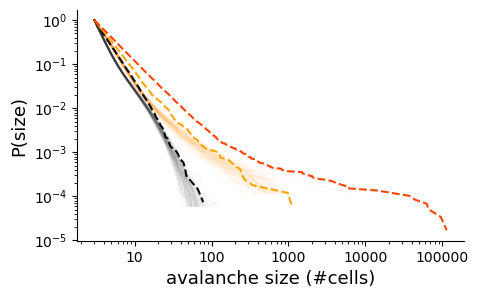

In [67]:
#COST MEAN
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange']
sns.reset_orig()

for i in range(100):
    av = bln_av_list[i]
    powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.01, c = 'black') 
    av = pre_av_list[i]
    powerlaw.plot_ccdf(av[np.where(av < 6600)[0]], linestyle = '-',linewidth =1.5 , markersize = 0.1, alpha = 0.01, c = 'orange') 

    
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

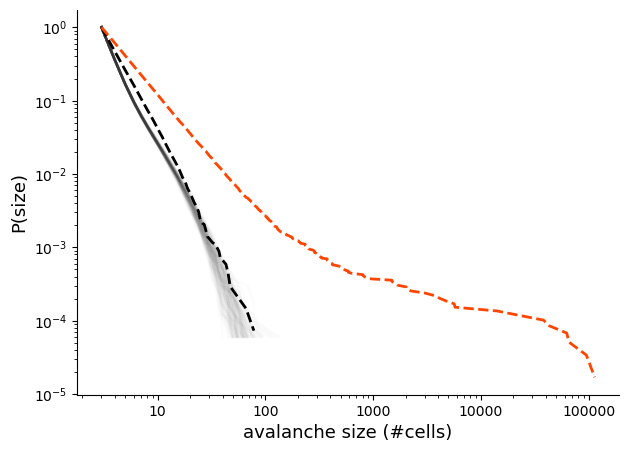

In [121]:
#COST MEAN
fig, axarr = plt.subplots(figsize = (7,5))
colors = ['orange']
sns.reset_orig()
bln_av_list = np.load(av_fit[0], allow_pickle=True)
pre_av_list = np.load(av_fit[1], allow_pickle=True)

for i in range(100):
    av = bln_av_list[i]
    powerlaw.plot_ccdf(av, linestyle = '-',linewidth = 2, markersize = 1, alpha = 0.01, c = 'black') 
    #av = pre_av_list[i]
    #powerlaw.plot_ccdf(av[np.where(av < 6600)[0]], linestyle = '-',linewidth =2 , markersize = 0.01, alpha = 0.1, c = 'orange') 

    
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =2 , markersize = 1, alpha = 1, c = 'black')
#avdistcut = pre_vec
#powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =2 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =2 , markersize = 1, alpha = 1, c = 'orangered')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.savefig('av_fits.svg', transparent = True)
plt.show()

In [131]:
kvth_av_list = list(range(10))
kvth_av = []
for i in range(5):
    bind, spikes, volt, sim_mon = netfn.run_net(sim_time, int(38.4), 18.8, pre_r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
    av, pkg = crfn.avalanche_r(net_nnb, bind)[0]
    kvth_av = np.append(kvth_av, av)

In [132]:
kr_av_list = list(range(10))
kr_av = []
for i in range(5):
    bind, spikes, volt, sim_mon = netfn.run_net(sim_time, int(21), pre_v_th, 5, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
    av, pkg = crfn.avalanche_r(net_nnb, bind)[0]
    kr_av = np.append(kr_av, av)

In [133]:
vthr_av_list = list(range(10))
vthr_av = []
for i in range(5):
    bind, spikes, volt, sim_mon = netfn.run_net(sim_time, int(pre_k), 16, 5, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
    av, pkg = crfn.avalanche_r(net_nnb, bind)[0]
    vthr_av = np.append(vthr_av, av)

In [134]:
k_av = []
for i in range(5):
    bind, spikes, volt, sim_mon = netfn.run_net(sim_time, int(39), pre_v_th, pre_r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
    av, pkg = crfn.avalanche_r(net_nnb, bind)[0]
    k_av = np.append(k_av, av)

In [135]:
vth_av = []
for i in range(5):
    bind, spikes, volt, sim_mon = netfn.run_net(sim_time, int(pre_k), 20, pre_r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
    av, pkg = crfn.avalanche_r(net_nnb, bind)[0]
    vth_av = np.append(vth_av, av)

In [136]:
r_av = []
for i in range(5):
    bind, spikes, volt, sim_mon = netfn.run_net(sim_time, int(pre_kmatplotlibh, 4.1, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
    av, pkg = crfn.avalanche_r(net_nnb, bind)[0]
    r_av = np.append(r_av, av)

In [137]:
two_list = kvth_av, kr_av, vthr_av
one_list = k_av, vth_av, r_av

In [141]:
count

1

In [179]:
bln_fit = []
for i in range(len(bln_av_list)):
    bln_fit = np.append(bln_fit, bln_av_list[i])


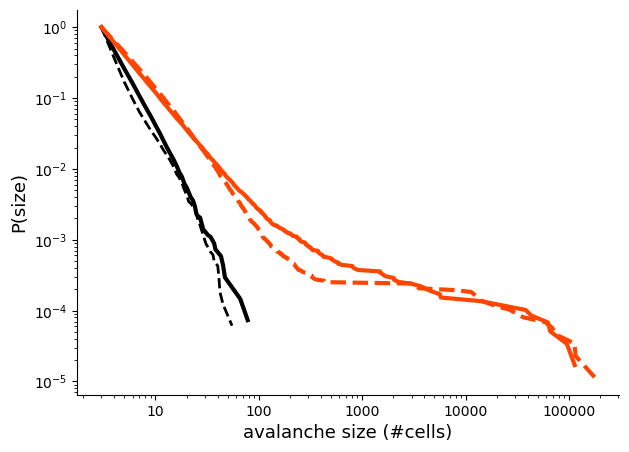

In [181]:
#COST MEAN
from matplotlib import cm
colors = cm.coolwarm(np.linspace(0, 1, 6))


fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
bln_av_list = np.load(av_fit[0], allow_pickle=True)
pre_av_list = np.load(av_fit[1], allow_pickle=True)

av = bln_av_list[i]
powerlaw.plot_ccdf(av, linestyle = '--',linewidth = 2, markersize = 1, alpha = 1, c = 'black') 
    
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 1, alpha = 1, c = 'black')
#avdistcut = pre_vec
#powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =2 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = kvth_av
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 1, alpha = 1, c = 'orangered')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 1, alpha = 1, c = 'orangered')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig('av_fits.svg', transparent = True)
plt.show()

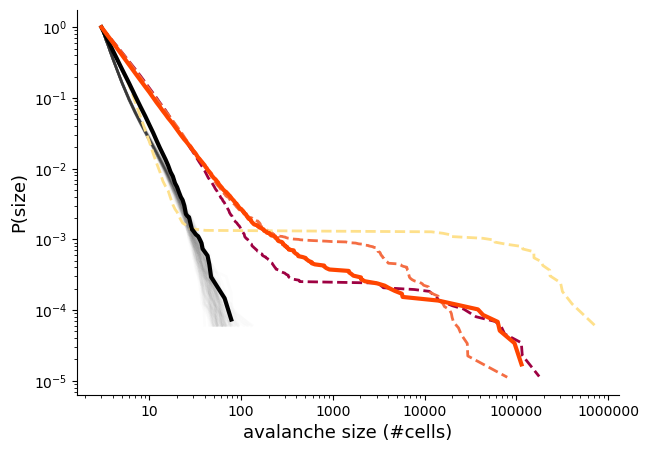

In [146]:
#COST MEAN
from matplotlib import cm
colors = cm.Spectral(np.linspace(0, 1, 6))


fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
bln_av_list = np.load(av_fit[0], allow_pickle=True)
pre_av_list = np.load(av_fit[1], allow_pickle=True)

for i in range(100):
    av = bln_av_list[i]
    powerlaw.plot_ccdf(av, linestyle = '-',linewidth = 2, markersize = 1, alpha = 0.01, c = 'black') 
    #av = pre_av_list[i]
    #powerlaw.plot_ccdf(av[np.where(av < 6600)[0]], linestyle = '-',linewidth =2 , markersize = 0.01, alpha = 0.1, c = 'orange') 

count=0
#for i in range(len(one_list)):
#    avdistcut = one_list[i]
#    powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =2 , markersize = 1, alpha = 1, c = colors[count])
#    count+=1
                     
for i in range(len(two_list)):
    avdistcut = two_list[i]
    powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =2 , markersize = 1, alpha = 1, c = colors[count])
    count+=1
    
avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 1, alpha = 1, c = 'black')
#avdistcut = pre_vec
#powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =2 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 1, alpha = 1, c = 'orangered')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
#plt.savefig('av_fits.svg', transparent = True)
plt.show()

In [149]:
def MSE(empirical, model):
    import numpy as np
    import matplotlib
    from matplotlib import pyplot as plt
    fig, axarr = plt.subplots(figsize = (5,3))

    binvec = np.append(empirical,model)
    mini = np.min(binvec)
    maxi = np.max(binvec)
    bins = 100000
    mod_hist = axarr.hist(model, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
    mod_xaxis = np.log10(mod_hist[1])
    mod_yaxis = np.log10(mod_hist[0])
    emp_hist = axarr.hist(empirical, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
    emp_xaxis = np.log10(emp_hist[1])
    emp_yaxis = np.log10(emp_hist[0])


    plt.close(fig)
    diff_sq = (emp_yaxis - mod_yaxis)**2
    end_index = np.where(diff_sq == float('inf'))[0][0]
    diff_sq_full = diff_sq[:end_index]
    MSE = np.sum(diff_sq_full)/ len(diff_sq_full)

    res = emp_yaxis - mod_yaxis
    res_full = res[:end_index]
    var_res = np.sum((res_full - np.mean(res_full))**2)/len(res_full)
    return(MSE, var_res)

In [161]:
AIC_list

array([11.74178937,  5.8519549 ,  3.10410392,  9.66834789,  8.56296031,
        5.74992618])

In [164]:
kvth_mse, var = MSE(p20_vec, kvth_av)
kr_mse, var = MSE(p20_vec, kr_av)
vthr_mse, var = MSE(p20_vec, vthr_av)
k_mse, var = MSE(p20_vec, k_av)
vth_mse, var = MSE(p20_vec, vth_av)
r_mse, var = MSE(p20_vec, r_av)



ok = kvth_mse, kr_mse, vthr_mse, k_mse, vth_mse, r_mse


#DUR - KS
namelist = ['edge density + threshold', 'edge density + synaptic scaling', 'vth + r','k', 'vth', 'r']

do_df = {}
do_df = pd.DataFrame({"MSE":ok , "Labels":  namelist})

In [165]:
do_df

MSE   Labels
0  0.020840  k + vth
1  0.396144    k + r
2  1.565097  vth + r
3  0.021619        k
4  0.037573      vth
5  0.153361        r

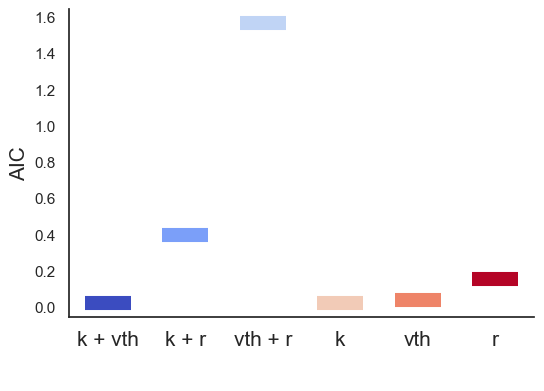

In [185]:
from matplotlib.collections import PathCollection
sns.set(style="white")
#colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
#colors2 = ['coral','cyan','teal']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="MSE", data = do_df, hue = 'Labels', palette = colors, join=True, ci=0, scale=5, markers = '_')

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '20')
ax.set_ylabel('AIC', size = '15')
ax.set_xticklabels(namelist, size = 15)
ax.legend_.remove()
plt.savefig('av_MSE.svg', transparent = True)
plt.show()

## Baseline - preictal 

### All parameters free

In [48]:
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
pre_fit = sorted(glob.glob('*brute*optimise*mean*pre.npy'))
pre_fit

['brute_optimise_mean_pre.npy']

In [121]:
total_list = np.load(pre_fit[0], allow_pickle=True)
total_list[-1]

array([array([ 2.45891693e+01,  1.89998368e+01, -3.13542149e-07]),
       0.13775236797756085,
       array([[3, 6, 4, ..., 3, 3, 3],
       [1, 1, 1, ..., 1, 1, 1]])], dtype=object)

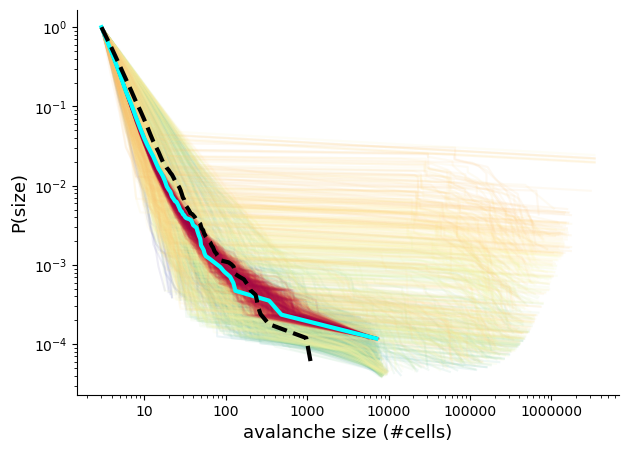

In [122]:
colors = cm.Spectral_r(np.linspace(0, 1, len(total_list)))
#Cycle length - small network
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()               
# Node coordinates
#---------------------------------------------------------------------------
for i in range(len(total_list)):
    av_dense = total_list[i][2][0]
    powerlaw.plot_ccdf(av_dense, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.1, c = colors[i])
avdistcut = total_list[-1][2][0]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'cyan')
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [123]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

empirical = av_dense
model = p20_vec

fig, axarr = plt.subplots(figsize = (5,3))
binvec = np.append(empirical,model)
mini = np.min(binvec)
maxi = np.max(binvec)
bins = 100000
model_hist = axarr.hist(model, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
model_xaxis = np.log10(model_hist[1])
model_yaxis = np.log10(model_hist[0])

emp_hist = axarr.hist(empirical, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
emp_xaxis = np.log10(emp_hist[1])
emp_yaxis = np.log10(emp_hist[0])

mod_inf = np.where(model_yaxis == float('-inf'))[0]
emp_inf = np.where(emp_yaxis == float('-inf'))[0]
plt.close(fig)

len(emp_inf)

93789

### 2 parameters free

### 1 parameter free

## Preictal - ictal 

In [30]:
#PRE PRAC PARAMS
os.chdir(Fdrop + 'Project/' + experiment)
pre_fit = sorted(glob.glob('*brute*optimise*pre.*'))
pre_fit
mean_pre = np.load(pre_fit[1], allow_pickle=True)[-1][0]
pre_k = int(mean_pre[0])
pre_v_th = mean_pre[1]
pre_r = int(mean_pre[2])
pre_k, pre_v_th, pre_r

(24, 18.999836773778092, 0)

### All parameters free

In [16]:
#K + Vth fit
kvthr_fit = sorted(glob.glob('*brute*optimise*mean*pre-p20*k_vth_r_c*'))
print(kvthr_fit)
total_list = np.load(kvthr_fit[0], allow_pickle=True)
total_list[-1]

['brute_optimise_mean_pre-p20_free_k_vth_r_const_na.npy']


array([array([2.66899008e+01, 1.49584056e+01, 2.08028257e-05]),
       0.10733621096930474,
       array([[ 4, 10,  3, ...,  3,  3,  3],
       [ 1,  1,  1, ...,  1,  1,  1]])], dtype=object)

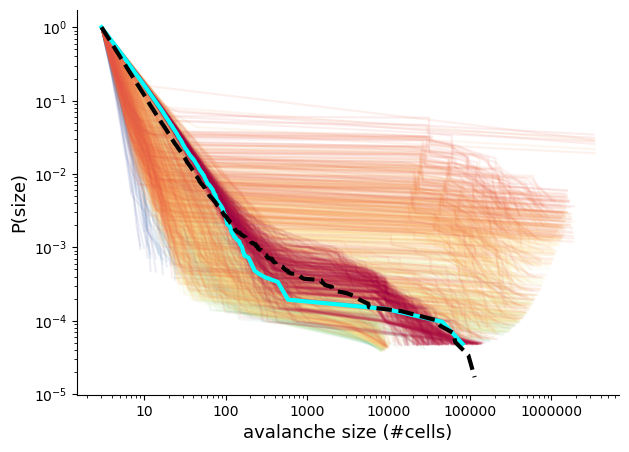

In [9]:
colors = cm.Spectral_r(np.linspace(0, 1, len(total_list)))
#Cycle length - small network
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()               
# Node coordinates
#---------------------------------------------------------------------------
for i in range(len(total_list)):
    av_dense = total_list[i][2][0]
    powerlaw.plot_ccdf(av_dense, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.1, c = colors[i])
avdistcut = total_list[-1][2][0]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'cyan')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [18]:
#K + Vth fit
kvthr_fit = sorted(glob.glob('*brute*optimise*mean*pre-p20*k_vth_r_c*'))
print(kvthr_fit)
pars = np.load(kvthr_fit[0], allow_pickle=True)[-1][0]
pars

['brute_optimise_mean_pre-p20_free_k_vth_r_const_na.npy']


array([2.66899008e+01, 1.49584056e+01, 2.08028257e-05])

In [14]:
np.load(kvthr_fit[0], allow_pickle=True)[-1]

array([array([2.66899008e+01, 1.49584056e+01, 2.08028257e-05]),
       0.10733621096930474,
       array([[ 4, 10,  3, ...,  3,  3,  3],
       [ 1,  1,  1, ...,  1,  1,  1]])], dtype=object)

In [24]:
kvthr_av_list = list(range(10))
for i in range(10):
    bind, spikes, volt, sim_mon = netfn.run_net(sim_time, int(26.6), 15, 0, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
    kvthr_av_list[i], pkg = crfn.avalanche_r(net_nnb, bind)[0]

In [42]:
curr_list = kvthr_av_list
mse_list = list(range(len(curr_list)))
for i in range(len(curr_list)):
    mse, var = MSE(p20_vec, curr_list[i])
    mse_list[i] = mse

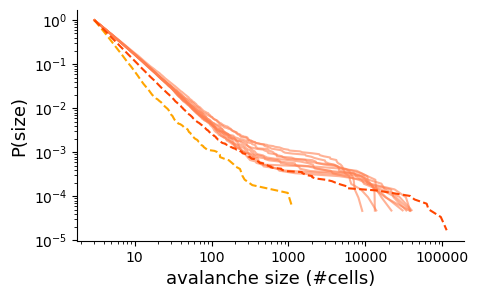

In [51]:
#COST MEAN
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange']
sns.reset_orig()

for i in range(len(curr_list)):
    powerlaw.plot_ccdf(curr_list[i], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.6, c = 'coral') 
    
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [43]:
mse_list

[0.05121228086951092,
 0.08067481896732383,
 0.14926742634283743,
 0.08377095279473945,
 0.10946781619319136,
 0.14623742821411287,
 0.05829229651654565,
 0.04928746271442407,
 0.024668342284833077,
 0.10664967668114511]

### 2 parameters free

In [8]:
#K + Vth fit
kvth_fit = sorted(glob.glob('*brute*optimise*mean*pre-p20*k_vth_c*'))
print(kvth_fit)
total_list = np.load(kvth_fit[0], allow_pickle=True)
total_list[-1]

['brute_optimise_mean_pre-p20_free_k_vth_const_r.npy']


array([array([38.44785658, 18.87280045]), 0.11816266475953151,
       array([[3, 4, 5, ..., 3, 4, 3],
       [1, 1, 1, ..., 1, 1, 1]])], dtype=object)

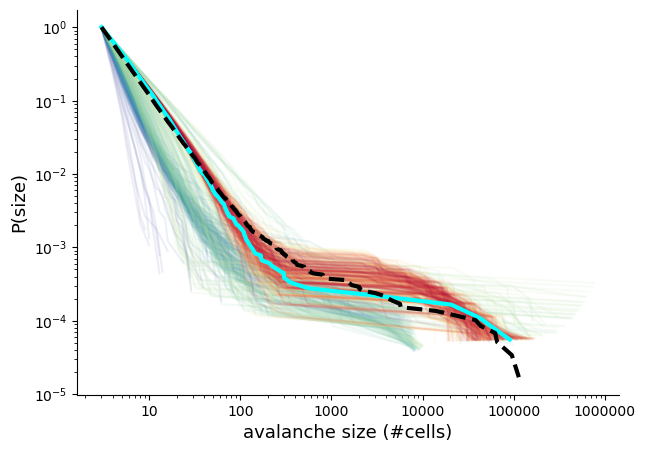

In [125]:
colors = cm.Spectral_r(np.linspace(0, 1, len(total_list)))
#Cycle length - small network
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()               
# Node coordinates
#---------------------------------------------------------------------------
for i in range(len(total_list)):
    av_dense = total_list[i][2][0]
    powerlaw.plot_ccdf(av_dense, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.1, c = colors[i])
avdistcut = total_list[-1][2][0]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'cyan')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [31]:
kvth_av_list = list(range(10))
for i in range(10):
    bind, spikes, volt, sim_mon = netfn.run_net(sim_time, int(38.4), 18.8, pre_r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
    kvth_av_list[i], pkg = crfn.avalanche_r(net_nnb, bind)[0]

In [52]:
curr_list = kvth_av_list
mse_list = list(range(len(curr_list)))
for i in range(len(curr_list)):
    mse, var = MSE(p20_vec, curr_list[i])
    mse_list[i] = mse

In [54]:
mse_list

[0.01745549502446789,
 0.03136837197338504,
 0.02128177422203177,
 0.07659094363846022,
 0.04897510248028793,
 0.05657384470447918,
 0.09825535358083125,
 0.067152845408263,
 0.0801162390803427,
 0.06970274887331282]

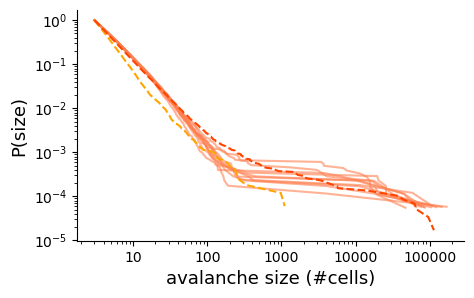

In [55]:
#COST MEAN
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange']
sns.reset_orig()

for i in range(len(curr_list)):
    powerlaw.plot_ccdf(curr_list[i], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.6, c = 'coral') 
    
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

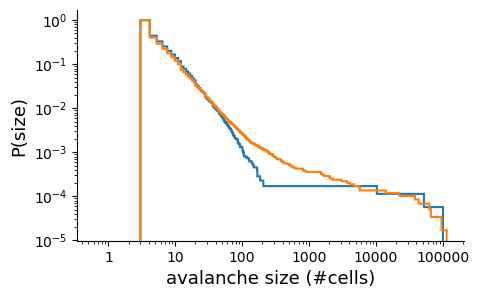

(0.03822735981307922, 0.026594721636716678, 12016)

In [228]:
empirical = p20_vec
model = kvth_av[0]


import numpy as np
import matplotlib
from matplotlib import pyplot as plt
fig, axarr = plt.subplots(figsize = (5,3))

binvec = np.append(empirical,model)
mini = np.min(binvec)
maxi = np.max(binvec)
bins = 100000
mod_hist = axarr.hist(model, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
mod_xaxis = np.log10(mod_hist[1])
mod_yaxis = np.log10(mod_hist[0])
emp_hist = axarr.hist(empirical, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
emp_xaxis = np.log10(emp_hist[1])
emp_yaxis = np.log10(emp_hist[0])


#plt.close(fig)
diff_sq = (emp_yaxis - mod_yaxis)**2
end_index = np.where(diff_sq == float('inf'))[0][0]
diff_sq_full = diff_sq[:end_index]
MSE = np.sum(diff_sq_full)/ len(diff_sq_full)

res = emp_yaxis - mod_yaxis
res_full = res[:end_index]
var_res = np.sum((res_full - np.mean(res_full))**2)/len(res_full)

plt.plot(emp_xaxis[1:], emp_yaxis, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])
plt.plot(mod_xaxis[1:], mod_yaxis, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])

axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


MSE, var_res, bins - end_index

In [222]:
MSE

0.03822735981307922

In [224]:
bins - end_index

12016

In [226]:
MSE

0.038014046470196

In [227]:
bins - end_index

94485

In [ ]:
75000 > start having an effect

In [236]:
MSE

0.07386816275871773

In [246]:
empty_bins = 50000

In [295]:
B =1
empty_bins = 10000
prac = (empty_bins *(10**-5))
print(prac)
np.exp(prac)

0.1


1.1051709180756477

In [296]:
B =1
empty_bins = 70000
prac = (empty_bins *(10**-5))
print(prac)
np.exp(prac)

0.7000000000000001


2.0137527074704766

In [262]:
2.7*0.

0.10800000000000001

In [279]:
10**0.7

5.011872336272722

In [ ]:
cost = MSE + 


bins - end_index

In [ ]:
#==============================
def ks_log(empirical, model): #Find the distance between 2 distributions in log space
#==============================
    import numpy as np
    import matplotlib
    from matplotlib import pyplot as plt
    fig, axarr = plt.subplots(figsize = (5,3))
    binvec = np.append(empirical,model)
    mini = np.min(binvec)
    maxi = np.max(binvec)
    bins = 100000
    model_hist = axarr.hist(model, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
    model_xaxis = np.log10(model_hist[1])
    model_yaxis = np.log10(model_hist[0])

    emp_hist = axarr.hist(empirical, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
    emp_xaxis = np.log10(emp_hist[1])
    emp_yaxis = np.log10(emp_hist[0])

    mod_inf = np.where(model_yaxis == float('-inf'))[0]
    emp_inf = np.where(emp_yaxis == float('-inf'))[0]
    plt.close(fig)
        
    if len(emp_inf) == 0 and len(mod_inf) == 0:
        end_index = len(emp_inf)

    elif len(emp_inf) == 0:
        end_index = mod_inf[0] 

    elif len(mod_inf) == 0:
        end_index = emp_inf[0] 
        

    diff_vec = abs(abs(model_yaxis[:end_index]) - abs(emp_yaxis[:end_index ]))

    cost_max, cost_mean = np.max(diff_vec), np.mean(diff_vec)

    return(cost_max, cost_mean)

In [21]:
#K + r fit
kr_fit = sorted(glob.glob('*brute*optimise*mean*pre-p20*k_r_c*'))
print(kr_fit)
total_list = np.load(kr_fit[0], allow_pickle=True)
total_list[-1]

['brute_optimise_mean_pre-p20_free_k_r_const_vth.npy']


array([array([21.87732707,  5.09119755]), 0.14212959700839708,
       array([[3, 4, 3, ..., 3, 7, 3],
       [1, 1, 1, ..., 1, 1, 1]])], dtype=object)

In [23]:
pars = np.load(kr_fit[0], allow_pickle=True)[-1][0]
pars

array([21.87732707,  5.09119755])

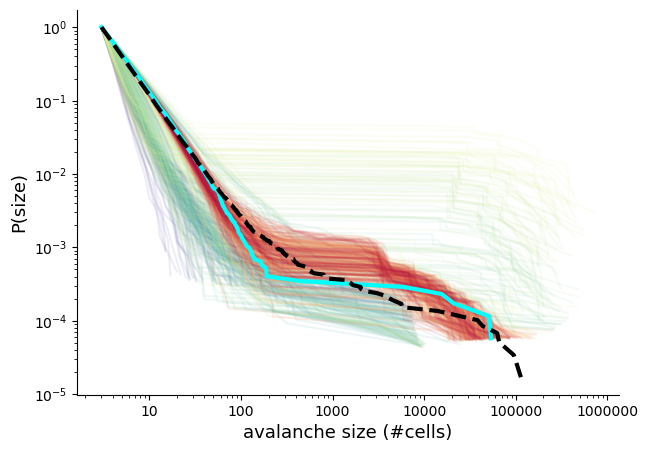

In [128]:
colors = cm.Spectral_r(np.linspace(0, 1, len(total_list)))
#Cycle length - small network
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()               
# Node coordinates
#---------------------------------------------------------------------------
for i in range(len(total_list)):
    av_dense = total_list[i][2][0]
    powerlaw.plot_ccdf(av_dense, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.1, c = colors[i])
avdistcut = total_list[-1][2][0]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'cyan')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

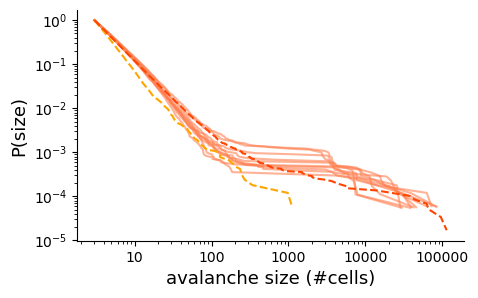

In [66]:
#COST MEAN
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange']
sns.reset_orig()

for i in range(len(curr_list)):
    powerlaw.plot_ccdf(curr_list[i][0], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.6, c = 'coral') 
    
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

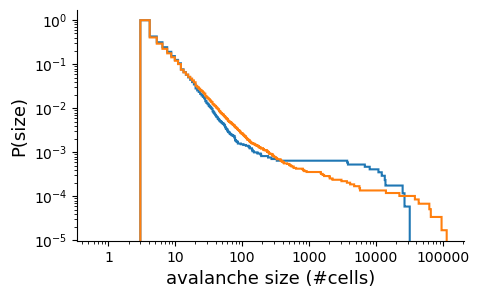

(0.10544780749999538, 0.06185047853103224, 71970)

In [229]:
empirical = p20_vec
model = kr_av[0]

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
fig, axarr = plt.subplots(figsize = (5,3))

binvec = np.append(empirical,model)
mini = np.min(binvec)
maxi = np.max(binvec)
bins = 100000
mod_hist = axarr.hist(model, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
mod_xaxis = np.log10(mod_hist[1])
mod_yaxis = np.log10(mod_hist[0])
emp_hist = axarr.hist(empirical, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
emp_xaxis = np.log10(emp_hist[1])
emp_yaxis = np.log10(emp_hist[0])


#plt.close(fig)
diff_sq = (emp_yaxis - mod_yaxis)**2
end_index = np.where(diff_sq == float('inf'))[0][0]
diff_sq_full = diff_sq[:end_index]
MSE = np.sum(diff_sq_full)/ len(diff_sq_full)

res = emp_yaxis - mod_yaxis
res_full = res[:end_index]
var_res = np.sum((res_full - np.mean(res_full))**2)/len(res_full)

plt.plot(emp_xaxis[1:], emp_yaxis, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])
plt.plot(mod_xaxis[1:], mod_yaxis, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])

axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


MSE, var_res, bins - end_index

In [151]:
#Vth + r fit
vthr_fit = sorted(glob.glob('*brute*optimise*mean*pre-p20*vth_r_c*'))[0]
print(vthr_fit)
total_list = np.load(vthr_fit, allow_pickle=True)
total_list[-1]

pars = np.load(vthr_fit[0], allow_pickle=True)[-1][0]


brute_optimise_mean_pre-p20_free_vth_r_const_k.npy


array([array([ 2.04983368e+01, -1.86307900e-04]), 0.10774306112541683,
       array([[4, 4, 3, ..., 4, 3, 3],
       [1, 1, 1, ..., 1, 1, 1]])], dtype=object)

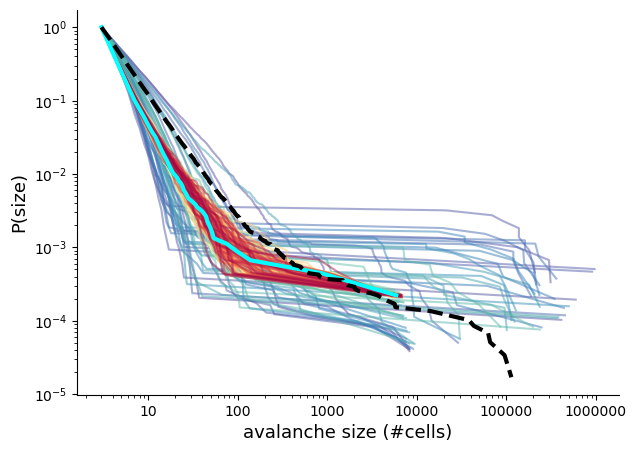

In [152]:
colors = cm.Spectral_r(np.linspace(0, 1, len(total_list)))
#Cycle length - small network
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()               
# Node coordinates
#---------------------------------------------------------------------------
for i in range(len(total_list)):
    av_dense = total_list[i][2][0]
    powerlaw.plot_ccdf(av_dense, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.5, c = colors[i])
avdistcut = total_list[-1][2][0]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'cyan')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [133]:
#Vth + r fit lim
vthr_fit = sorted(glob.glob('*brute*optimise*mean*pre-p20*vth_r_c*'))[1]
print(vthr_fit)
total_list = np.load(vthr_fit, allow_pickle=True)
total_list[-1]

brute_optimise_mean_pre-p20_free_vth_r_const_k_lim70k.npy


array([array([16.12261509,  2.00459764]), 0.2072383261277735,
       array([[3, 5, 3, ..., 4, 4, 4],
       [1, 1, 1, ..., 1, 1, 1]])], dtype=object)

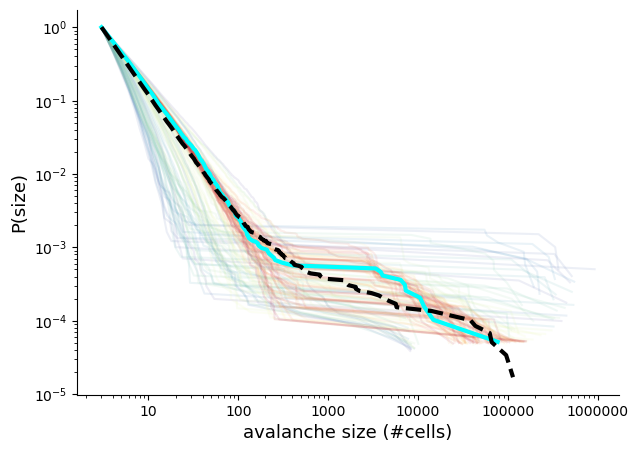

In [134]:
colors = cm.Spectral_r(np.linspace(0, 1, len(total_list)))
#Cycle length - small network
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()               
# Node coordinates
#---------------------------------------------------------------------------
for i in range(len(total_list)):
    av_dense = total_list[i][2][0]
    powerlaw.plot_ccdf(av_dense, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.1, c = colors[i])
avdistcut = total_list[-1][2][0]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'cyan')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

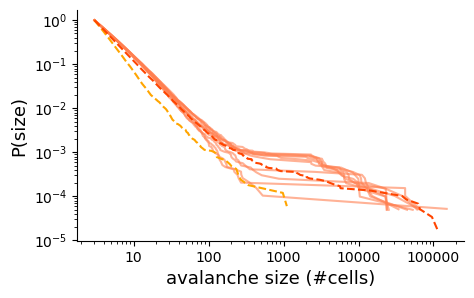

In [70]:
#COST MEAN
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange']
sns.reset_orig()

for i in range(len(curr_list)):
    powerlaw.plot_ccdf(curr_list[i][0], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.6, c = 'coral') 
    
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

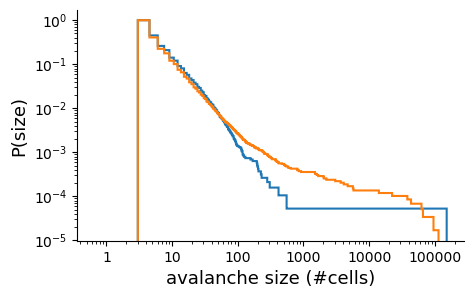

(0.10680088791522876, 0.10609013088914723, 24885)

In [230]:
empirical = p20_vec
model = vthr_av[0]

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
fig, axarr = plt.subplots(figsize = (5,3))

binvec = np.append(empirical,model)
mini = np.min(binvec)
maxi = np.max(binvec)
bins = 100000
mod_hist = axarr.hist(model, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
mod_xaxis = np.log10(mod_hist[1])
mod_yaxis = np.log10(mod_hist[0])
emp_hist = axarr.hist(empirical, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
emp_xaxis = np.log10(emp_hist[1])
emp_yaxis = np.log10(emp_hist[0])


#plt.close(fig)
diff_sq = (emp_yaxis - mod_yaxis)**2
end_index = np.where(diff_sq == float('inf'))[0][0]
diff_sq_full = diff_sq[:end_index]
MSE = np.sum(diff_sq_full)/ len(diff_sq_full)

res = emp_yaxis - mod_yaxis
res_full = res[:end_index]
var_res = np.sum((res_full - np.mean(res_full))**2)/len(res_full)

plt.plot(emp_xaxis[1:], emp_yaxis, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])
plt.plot(mod_xaxis[1:], mod_yaxis, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])

axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


MSE, var_res, bins - end_index

### 1 parameter free

In [155]:
#k fit
k_fit = sorted(glob.glob('*brute*optimise*mean*pre-p20*free_k_c*'))[0]
print(k_fit)
total_list = np.load(k_fit, allow_pickle=True)
total_list[-1]

brute_optimise_mean_pre-p20_free_k_const_vth_r.npy


array([array([17.46527824]), 0.11083661322469428,
       array([[3, 3, 3, ..., 3, 3, 3],
       [1, 1, 1, ..., 1, 1, 1]])], dtype=object)

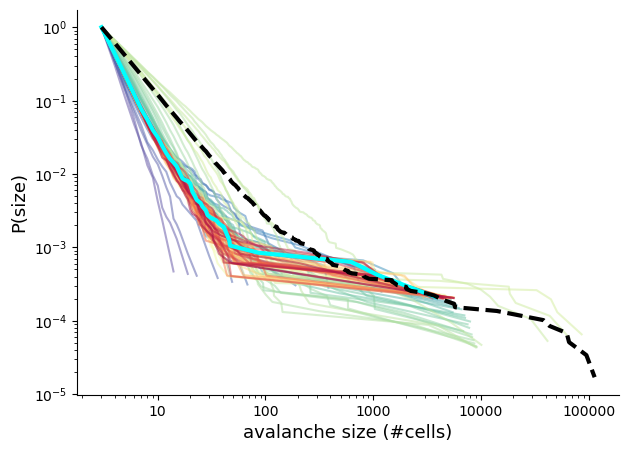

In [156]:
colors = cm.Spectral_r(np.linspace(0, 1, len(total_list)))
#Cycle length - small network
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()               
# Node coordinates
#---------------------------------------------------------------------------
for i in range(len(total_list)):
    av_dense = total_list[i][2][0]
    powerlaw.plot_ccdf(av_dense, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.5, c = colors[i])
avdistcut = total_list[-1][2][0]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'cyan')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [105]:
#k fit lim
k_fit = sorted(glob.glob('*brute*optimise*mean*pre-p20*free_k_c*'))[1]
print(k_fit)
total_list = np.load(k_fit, allow_pickle=True)
total_list[-1]

brute_optimise_mean_pre-p20_free_k_const_vth_r_lim85k.npy


array([array([39.]), 0.22727467588428063,
       array([[3, 3, 3, ..., 3, 3, 3],
       [1, 1, 1, ..., 1, 1, 1]])], dtype=object)

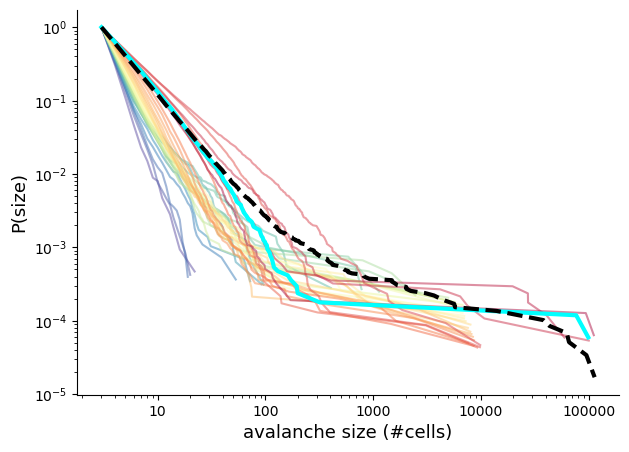

In [158]:
colors = cm.Spectral_r(np.linspace(0, 1, len(total_list)))
#Cycle length - small network
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()               
# Node coordinates
#---------------------------------------------------------------------------
for i in range(len(total_list)):
    av_dense = total_list[i][2][0]
    powerlaw.plot_ccdf(av_dense, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.5, c = colors[i])
avdistcut = total_list[-1][2][0]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'cyan')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [106]:
comb_k = []
for i in range(len(k_av_list)):
    comb_k = np.append(comb_k, k_av_list[i])

In [107]:
comb_vth = []
for i in range(len(vth_av_list)):
    comb_vth = np.append(comb_vth, vth_av_list[i])

In [108]:
comb_r = []
for i in range(len(r_av_list)):
    comb_r = np.append(comb_r, r_av_list[i])

In [110]:
k_mse, var = MSE(p20_vec, comb_k)
vth_mse, var = MSE(p20_vec, comb_vth)
r_mse, var = MSE(p20_vec, comb_r)

In [113]:
ok = k_mse, vth_mse, r_mse
ok

(0.16631818411351063, 0.26349996513395163, 0.4733920660727857)

In [114]:
#DUR - KS
namelist = ['edge density', 'threshold', 'synaptic scaling']

do_df = {}
do_df = pd.DataFrame({"MSE":ok , "Labels":  namelist})

In [115]:
do_df

MSE            Labels
0  0.166318      edge density
1  0.263500         threshold
2  0.473392  synaptic scaling

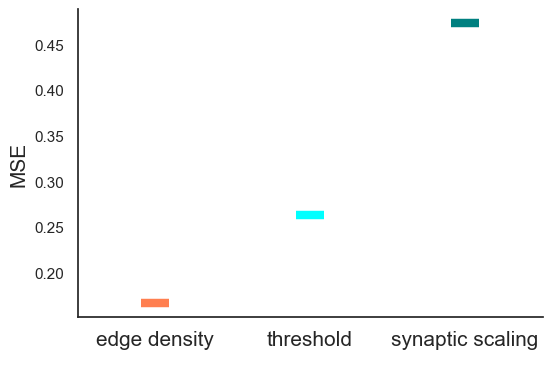

In [150]:
from matplotlib.collections import PathCollection
sns.set(style="white")
#colors1 = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
colors2 = ['coral','cyan','teal']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="MSE", data = do_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=3, markers = '_')

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('MSE', size = '15')
ax.set_xticklabels(namelist, size = 15)
ax.legend_.remove()
plt.savefig('av_MSE.svg', transparent = True)
plt.show()



In [103]:
curr_list = k_av_list
k_mse_list = list(range(len(curr_list)))
for i in range(len(curr_list)):
    mse, var = MSE(p20_vec, curr_list[i][0])
    k_mse_list[i] = mse

In [104]:
k_mse_list

[0.040616726614151985,
 0.051046923272330874,
 0.08492760903075719,
 0.08150414678552158,
 0.10983088961527863,
 0.12838744565560942,
 0.07964131655008536,
 0.0419205585873985,
 0.06679004984646242,
 0.04948435772273411]

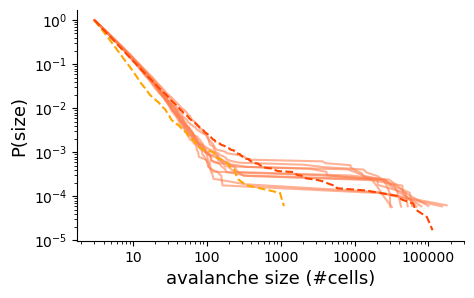

In [73]:
#COST MEAN
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange']
sns.reset_orig()

for i in range(len(curr_list)):
    powerlaw.plot_ccdf(curr_list[i][0], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.6, c = 'coral') 
    
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

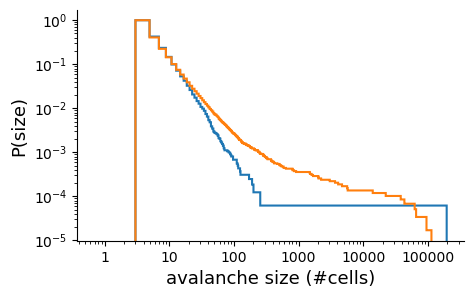

(0.11048686625813653, 0.1088714556105372, 41895)

In [231]:
empirical = p20_vec
model = k_av[0]

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
fig, axarr = plt.subplots(figsize = (5,3))

binvec = np.append(empirical,model)
mini = np.min(binvec)
maxi = np.max(binvec)
bins = 100000
mod_hist = axarr.hist(model, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
mod_xaxis = np.log10(mod_hist[1])
mod_yaxis = np.log10(mod_hist[0])
emp_hist = axarr.hist(empirical, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
emp_xaxis = np.log10(emp_hist[1])
emp_yaxis = np.log10(emp_hist[0])


#plt.close(fig)
diff_sq = (emp_yaxis - mod_yaxis)**2
end_index = np.where(diff_sq == float('inf'))[0][0]
diff_sq_full = diff_sq[:end_index]
MSE = np.sum(diff_sq_full)/ len(diff_sq_full)

res = emp_yaxis - mod_yaxis
res_full = res[:end_index]
var_res = np.sum((res_full - np.mean(res_full))**2)/len(res_full)

plt.plot(emp_xaxis[1:], emp_yaxis, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])
plt.plot(mod_xaxis[1:], mod_yaxis, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])

axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


MSE, var_res, bins - end_index

In [147]:
#vth fit
vth_fit = sorted(glob.glob('*brute*optimise*mean*pre-p20*free_vth_c*'))[0]
print(vth_fit)
total_list = np.load(vth_fit, allow_pickle=True)
total_list[-1]

brute_optimise_mean_pre-p20_free_vth_const_k_r.npy


array([array([20.00000381]), 0.11486274974575442,
       array([[3, 3, 3, ..., 3, 3, 3],
       [1, 1, 1, ..., 1, 1, 1]])], dtype=object)

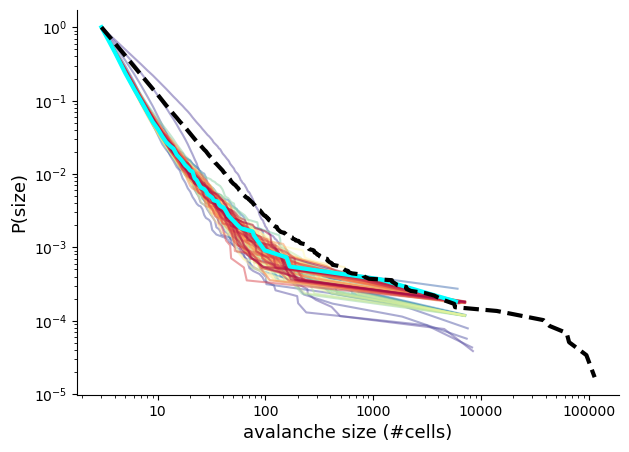

In [148]:
colors = cm.Spectral_r(np.linspace(0, 1, len(total_list)))
#Cycle length - small network
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()               
# Node coordinates
#---------------------------------------------------------------------------
for i in range(len(total_list)):
    av_dense = total_list[i][2][0]
    powerlaw.plot_ccdf(av_dense, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.5, c = colors[i])
avdistcut = total_list[-1][2][0]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'cyan')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [149]:
#vth fit lim
vth_fit = sorted(glob.glob('*brute*optimise*mean*pre-p20*free_vth_c*'))[1]
print(vth_fit)
total_list = np.load(vth_fit, allow_pickle=True)
total_list[-1]

brute_optimise_mean_pre-p20_free_vth_const_k_r_lim100k.npy


array([array([20.56250429]), 0.12609936157597998,
       array([[5, 4, 3, ..., 3, 3, 4],
       [1, 1, 1, ..., 1, 1, 1]])], dtype=object)

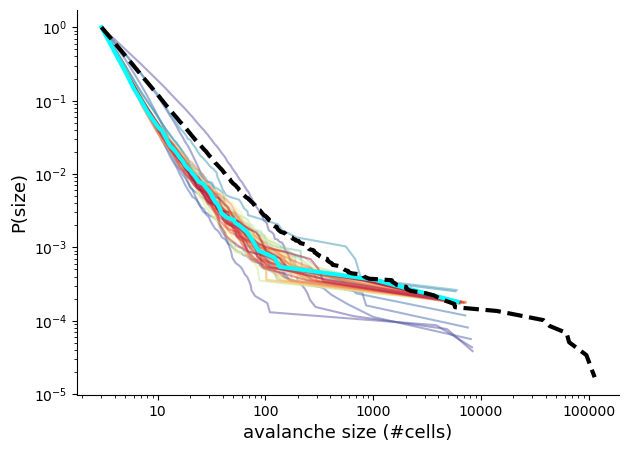

In [150]:
colors = cm.Spectral_r(np.linspace(0, 1, len(total_list)))
#Cycle length - small network
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()               
# Node coordinates
#---------------------------------------------------------------------------
for i in range(len(total_list)):
    av_dense = total_list[i][2][0]
    powerlaw.plot_ccdf(av_dense, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.5, c = colors[i])
avdistcut = total_list[-1][2][0]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'cyan')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [35]:
bind, spikes, volt, sim_mon = netfn.run_net(sim_time, int(pre_k), 20, pre_r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
vth_av, pkg = crfn.avalanche_r(net_nnb, bind)
#cost_max, cost_mean = netfn.ks_log(av[0], p20_vec)


In [36]:
vth_av_list = list(range(10))
for i in range(10):
    bind, spikes, volt, sim_mon = netfn.run_net(sim_time, int(pre_k), 20, pre_r, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
    vth_av_list[i], pkg = crfn.avalanche_r(net_nnb, bind)

In [80]:
curr_list = vth_av_list
mse_list = list(range(len(curr_list)))
for i in range(len(curr_list)):
    mse, var = MSE(p20_vec, curr_list[i][0])
    mse_list[i] = mse + 1

In [81]:
mse_list

[1.0425253521016178,
 1.0427239674719586,
 1.0515769348744142,
 1.032622337187736,
 1.0697815592889002,
 1.032623668676842,
 1.0440304121687207,
 1.0287386796876676,
 1.0570633011695716,
 1.0312615292072551]

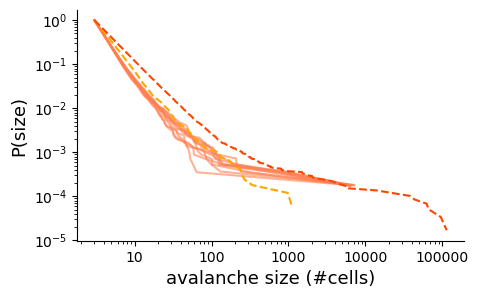

In [76]:
#COST MEAN
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange']
sns.reset_orig()

for i in range(len(curr_list)):
    powerlaw.plot_ccdf(curr_list[i][0], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.6, c = 'coral') 
    
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

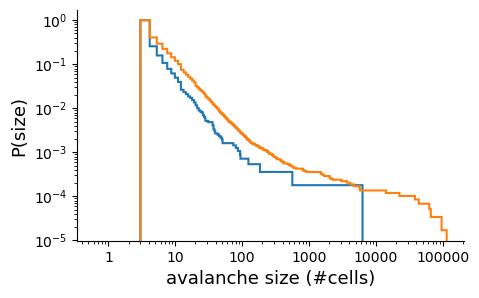

(0.038014046470196, 0.02379633081048356, 94485)

In [232]:
empirical = p20_vec
model = vth_av[0]

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
fig, axarr = plt.subplots(figsize = (5,3))

binvec = np.append(empirical,model)
mini = np.min(binvec)
maxi = np.max(binvec)
bins = 100000
mod_hist = axarr.hist(model, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
mod_xaxis = np.log10(mod_hist[1])
mod_yaxis = np.log10(mod_hist[0])
emp_hist = axarr.hist(empirical, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
emp_xaxis = np.log10(emp_hist[1])
emp_yaxis = np.log10(emp_hist[0])


#plt.close(fig)
diff_sq = (emp_yaxis - mod_yaxis)**2
end_index = np.where(diff_sq == float('inf'))[0][0]
diff_sq_full = diff_sq[:end_index]
MSE = np.sum(diff_sq_full)/ len(diff_sq_full)

res = emp_yaxis - mod_yaxis
res_full = res[:end_index]
var_res = np.sum((res_full - np.mean(res_full))**2)/len(res_full)

plt.plot(emp_xaxis[1:], emp_yaxis, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])
plt.plot(mod_xaxis[1:], mod_yaxis, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])

axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


MSE, var_res, bins - end_index

In [159]:
# r fit
r_fit = sorted(glob.glob('*brute*optimise*mean*pre-p20*free_r_c*'))[0]
print(r_fit)

total_list = np.load(r_fit, allow_pickle=True)
total_list[-1]

brute_optimise_mean_pre-p20_free_r_const_k_vth.npy


array([array([3.26250915]), 0.15013420309161554,
       array([[3, 4, 3, ..., 3, 3, 3],
       [1, 1, 1, ..., 1, 1, 1]])], dtype=object)

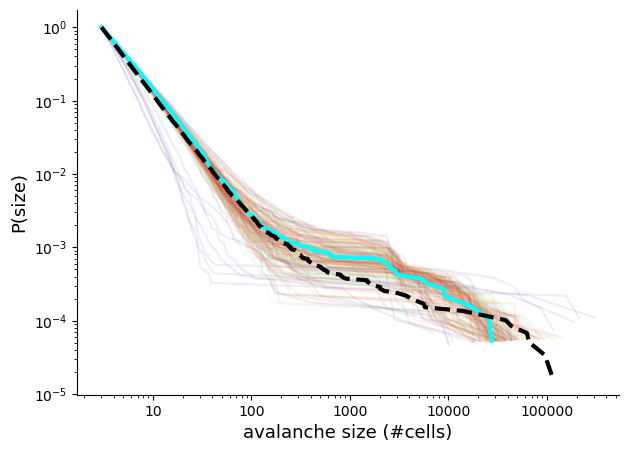

In [160]:
colors = cm.Spectral_r(np.linspace(0, 1, len(total_list)))
#Cycle length - small network
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()               
# Node coordinates
#---------------------------------------------------------------------------
for i in range(len(total_list)):
    av_dense = total_list[i][2][0]
    powerlaw.plot_ccdf(av_dense, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.1, c = colors[i])
avdistcut = total_list[-1][2][0]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'cyan')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [161]:
# r fit
r_fit = sorted(glob.glob('*brute*optimise*mean*pre-p20*free_r_c*'))[1]
print(r_fit)
total_list = np.load(r_fit, allow_pickle=True)
total_list[-1]

brute_optimise_mean_pre-p20_free_r_const_k_vth_lim85k.npy


array([array([4.1]), 0.4354622846994074,
       array([[3, 3, 5, ..., 4, 7, 3],
       [1, 1, 1, ..., 1, 1, 1]])], dtype=object)

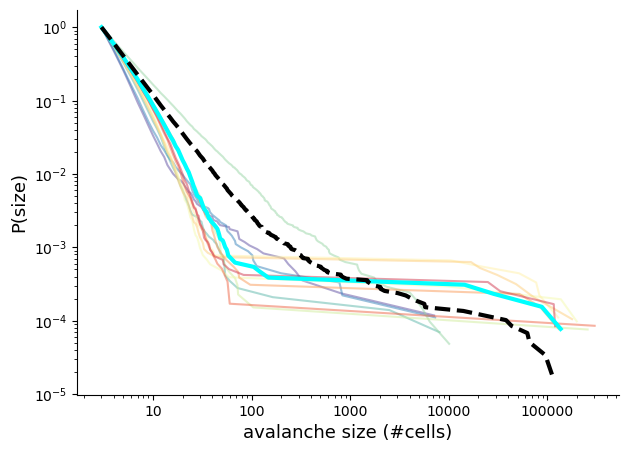

In [163]:
colors = cm.Spectral_r(np.linspace(0, 1, len(total_list)))
#Cycle length - small network
import matplotlib
import powerlaw
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()               
# Node coordinates
#---------------------------------------------------------------------------
for i in range(len(total_list)):
    av_dense = total_list[i][2][0]
    powerlaw.plot_ccdf(av_dense, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.5, c = colors[i])
avdistcut = total_list[-1][2][0]
powerlaw.plot_ccdf(avdistcut, linestyle = '-',linewidth =3 , markersize = 3, alpha = 1, c = 'cyan')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =3 , markersize = 3, alpha = 1, c = 'k')
axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [205]:
bind, spikes, volt, sim_mon = netfn.run_net(sim_time, int(pre_k), pre_v_th, 4.1, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
r2_av, pkg = crfn.avalanche_r(net_nnb, bind)
#cost_max, cost_mean = netfn.ks_log(av[0], p20_vec)


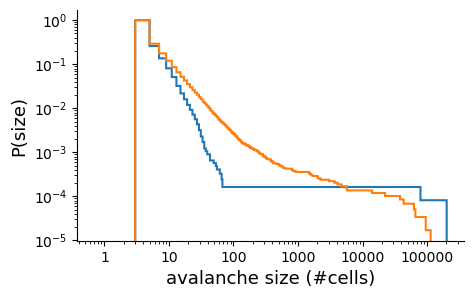

(0.19748387572587933, 0.06167709385525064, 43499)

In [233]:
empirical = p20_vec
model = r2_av[0]

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
fig, axarr = plt.subplots(figsize = (5,3))

binvec = np.append(empirical,model)
mini = np.min(binvec)
maxi = np.max(binvec)
bins = 100000
mod_hist = axarr.hist(model, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
mod_xaxis = np.log10(mod_hist[1])
mod_yaxis = np.log10(mod_hist[0])
emp_hist = axarr.hist(empirical, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
emp_xaxis = np.log10(emp_hist[1])
emp_yaxis = np.log10(emp_hist[0])


#plt.close(fig)
diff_sq = (emp_yaxis - mod_yaxis)**2
end_index = np.where(diff_sq == float('inf'))[0][0]
diff_sq_full = diff_sq[:end_index]
MSE = np.sum(diff_sq_full)/ len(diff_sq_full)

res = emp_yaxis - mod_yaxis
res_full = res[:end_index]
var_res = np.sum((res_full - np.mean(res_full))**2)/len(res_full)

plt.plot(emp_xaxis[1:], emp_yaxis, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])
plt.plot(mod_xaxis[1:], mod_yaxis, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])

axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


MSE, var_res, bins - end_index

In [37]:
r_av_list = list(range(10))
for i in range(10):
    bind, spikes, volt, sim_mon = netfn.run_net(sim_time, int(pre_k), pre_v_th, 3.26, s, divisor, soften, N, dist, v_rest, t_syn_del, tau_l, N_e, lam, w_e)
    r_av_list[i], pkg = crfn.avalanche_r(net_nnb, bind)
    #cost_max, cost_mean = netfn.ks_log(av[0], p20_vec)


In [77]:
curr_list = r_av_list
mse_list = list(range(len(curr_list)))
for i in range(len(curr_list)):
    mse, var = MSE(p20_vec, curr_list[i][0])
    mse_list[i] = mse

In [78]:
mse_list

[0.06349294217371293,
 0.04663561273410229,
 0.08460147050260312,
 0.038647100582400395,
 0.0712130498454911,
 0.11671387956481379,
 0.016414164851397153,
 0.08092061870061316,
 0.06722134617058809,
 0.08689589778060157]

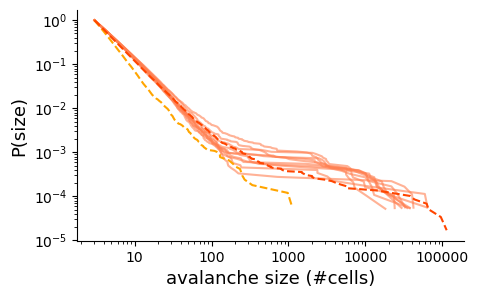

In [79]:
#COST MEAN
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange']
sns.reset_orig()

for i in range(len(curr_list)):
    powerlaw.plot_ccdf(curr_list[i][0], linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 0.6, c = 'coral') 
    
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

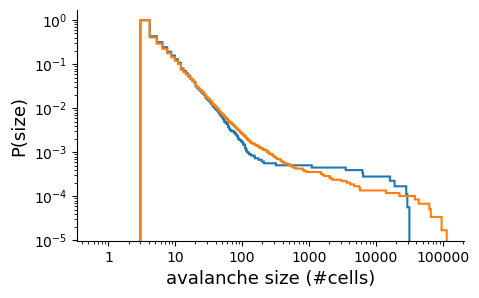

(0.07386816275871773, 0.026588117727732695, 72296)

In [234]:
empirical = p20_vec
model = r1_av[0]

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
fig, axarr = plt.subplots(figsize = (5,3))

binvec = np.append(empirical,model)
mini = np.min(binvec)
maxi = np.max(binvec)
bins = 100000
mod_hist = axarr.hist(model, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
mod_xaxis = np.log10(mod_hist[1])
mod_yaxis = np.log10(mod_hist[0])
emp_hist = axarr.hist(empirical, bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 1.5, cumulative=-1)
emp_xaxis = np.log10(emp_hist[1])
emp_yaxis = np.log10(emp_hist[0])


#plt.close(fig)
diff_sq = (emp_yaxis - mod_yaxis)**2
end_index = np.where(diff_sq == float('inf'))[0][0]
diff_sq_full = diff_sq[:end_index]
MSE = np.sum(diff_sq_full)/ len(diff_sq_full)

res = emp_yaxis - mod_yaxis
res_full = res[:end_index]
var_res = np.sum((res_full - np.mean(res_full))**2)/len(res_full)

plt.plot(emp_xaxis[1:], emp_yaxis, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])
plt.plot(mod_xaxis[1:], mod_yaxis, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = colors[i])

axarr.set_xscale('log')
axarr.set_yscale('log')    
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


MSE, var_res, bins - end_index

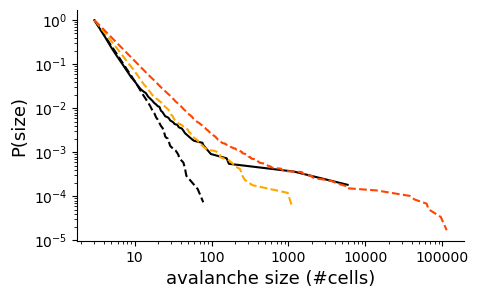

In [202]:
#COST MEAN
fig, axarr = plt.subplots(figsize = (5,3))
colors = ['orange']
sns.reset_orig()

av = vth_par[2][0]
powerlaw.plot_ccdf(av, linestyle = '-',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black') 

avdistcut = bln_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'black')
avdistcut = pre_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orange')
avdistcut = p20_vec
powerlaw.plot_ccdf(avdistcut, linestyle = '--',linewidth =1.5 , markersize = 1, alpha = 1, c = 'orangered')
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()